In [1]:
import sys
sys.path.insert(0, '..')
import numpy as np
from BinaryTokenizer import BinaryTokenizer

In [2]:
data = np.load('../data/augmented_and_padded_data.npz')
print(data)
melody_pcps = data['melody_pcps']
chord_pcps = data['chord_pcps']

NpzFile '../data/augmented_and_padded_data.npz' with keys: melody_pcps, chord_pcps, chord_roots, chord_types


In [3]:
print('melody_pcps.shape: ', melody_pcps.shape)
print('chord_pcps.shape: ', chord_pcps.shape)
print(melody_pcps[0,:,:])
print(chord_pcps[0,:,:])

melody_pcps.shape:  (5328, 129, 12)
chord_pcps.shape:  (5328, 129, 12)
[[1 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 0 1 ... 1 0 0]
 [0 0 1 ... 0 0 1]
 [1 0 1 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
# padding test
p = np.pad(chord_pcps, ( (0,0), (1,0), (0,0) ), mode='constant', constant_values=0 )
print('p.shape: ', p.shape)
print(p[0,:,:])

p.shape:  (5328, 130, 12)
[[0 0 0 ... 0 0 0]
 [1 0 1 ... 1 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
binTok = BinaryTokenizer()

In [28]:
tok_melody = binTok.fit_transform( melody_pcps )
tok_chord = binTok.fit_transform( chord_pcps )

In [29]:
print('tok_melody.shape: ', tok_melody.shape)
print('tok_chord.shape: ', tok_chord.shape)
print(tok_melody[0,:])
print(tok_chord[0,:])

tok_melody.shape:  (5328, 129)
tok_chord.shape:  (5328, 129)
[2052    1 2052    1   17    4   17    4 2052    1 2052   17  128  128
 1152  256 1152  256  257 1024  257 1024 1152  256 1152  257    8   16
 2052    1 2052    1   17    4   17    4 2052    1 2052   17   16   16
    4   16   64  128   16   64  640 2052    1 2052  129 2048 2048    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]
[2628  593 2628  593 2193 2372  657 1172 2628  593 2628  593 2193 2193
 1188  293 1188  293  393 1172  297 1097 1188  293 1188  293  393  593
 2628  593 2628  593 2193 2372  657 1172 2628  593 2628  593  658 1174
 2628 1170 2244 1170 2628 2628  586  657 2340 2628  593 2196 2196    0

In [30]:
# unique
u_melody = np.unique( tok_melody )
print('unique melody tokens: ', len(u_melody) , ' / 4096')
u_chord = np.unique( tok_chord )
print('unique chord tokens: ', len(u_chord) , ' / 4096')

unique melody tokens:  2171  / 4096
unique chord tokens:  1496  / 4096


In [31]:
# check similarity between melody and chord pcps
similarity_per_chord = []
pc_chords_over_melodies_ratio = []
sum_pcs_melody = []
sum_pcs_chord = []
for i in range(melody_pcps.shape[0]):
    for j in range(melody_pcps.shape[1]):
        if np.sum(melody_pcps[i,j,:]) > 0:
            similarity_per_chord.append( np.sum(np.logical_and(melody_pcps[i,j,:], chord_pcps[i,j,:]))/np.sum(melody_pcps[i,j,:]) )
            pc_chords_over_melodies_ratio.append( np.sum(chord_pcps[i,j,:])/np.sum(melody_pcps[i,j,:]) )
            sum_pcs_melody.append( np.sum(melody_pcps[i,j,:]) )
            sum_pcs_chord.append( np.sum(chord_pcps[i,j,:]) )

In [38]:
s = np.array(similarity_per_chord)
r = np.array(pc_chords_over_melodies_ratio)
m = np.array(sum_pcs_melody)
c = np.array(sum_pcs_chord)
print(np.mean(s))
print(np.mean(r))
print(np.mean(m))
print(np.mean(c))

0.7403842650937908
2.4650007086821244
2.213444809885347
4.150682896341151


In [33]:
import matplotlib.pyplot as plt

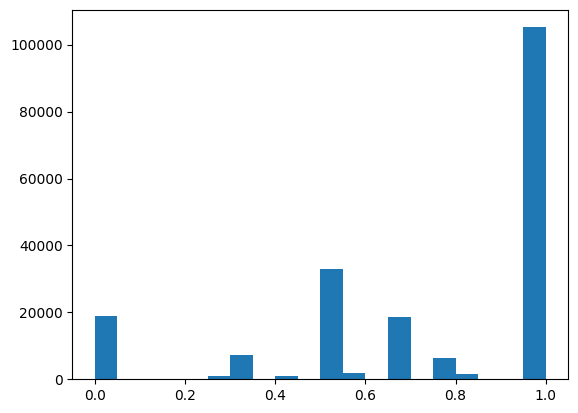

In [34]:
s_counts, s_bins = np.histogram(s, 20)
s_hist = plt.hist(s_bins[:-1], s_bins, weights=s_counts)

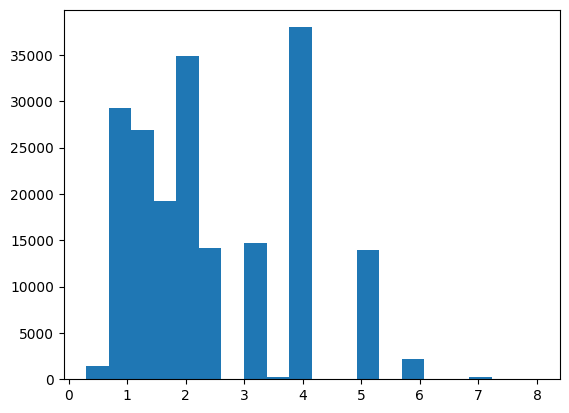

In [35]:
r_counts, r_bins = np.histogram(r, 20)
r_hist = plt.hist(r_bins[:-1], r_bins, weights=r_counts)

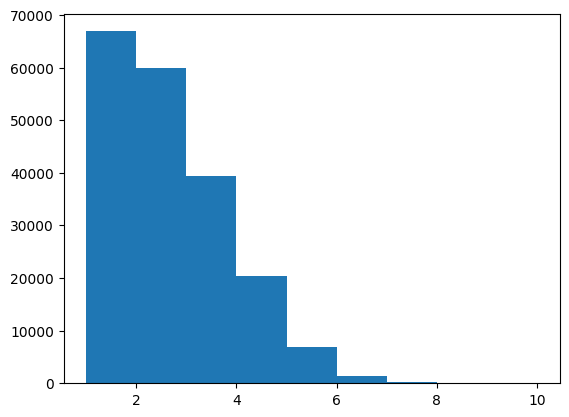

In [60]:
m_counts, m_bins = np.histogram(m, np.max(m)-np.min(m))
m_hist = plt.hist(m_bins[:-1], m_bins, weights=m_counts)

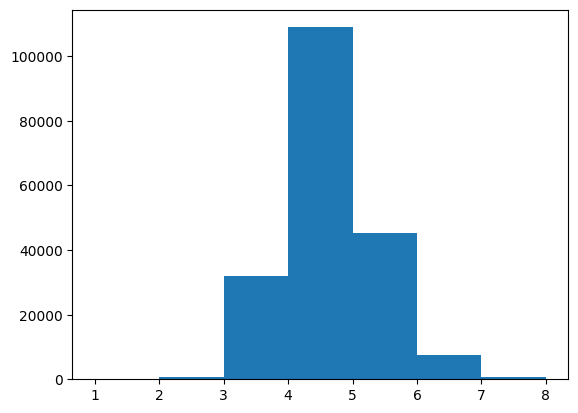

In [52]:
c_counts, c_bins = np.histogram(c, np.max(c)-np.min(c))
c_hist = plt.hist(c_bins[:-1], c_bins, weights=c_counts)

In [53]:
print(c_bins)

[1. 2. 3. 4. 5. 6. 7. 8.]


In [61]:
chord_pcs_num = np.random.choice(np.arange( np.min(c), np.max(c), 1 ), size=( 100,), p=c_counts/np.sum(c_counts))
print(chord_pcs_num)
melody_pcs_num = np.random.choice(np.arange( np.min(m), np.max(m), 1 ), size=( 100,), p=m_counts/np.sum(m_counts))
print(melody_pcs_num)

[3 3 4 5 3 4 4 4 4 4 4 4 3 4 4 4 4 3 4 4 4 5 6 5 3 4 4 4 4 4 4 3 4 4 4 4 4
 5 4 4 4 4 6 5 4 4 4 4 4 4 4 4 4 5 4 4 4 3 4 4 3 4 4 5 5 4 4 3 4 4 5 3 5 4
 5 5 4 4 3 4 3 5 3 4 4 4 4 4 3 4 5 5 3 4 3 6 3 4 3 4]
[5 1 1 6 2 1 1 1 1 1 2 1 3 1 4 1 2 1 3 2 4 1 1 1 2 4 1 2 2 2 2 2 1 1 1 3 1
 2 4 1 4 1 4 1 3 3 1 2 3 2 3 3 1 4 2 1 1 1 1 3 3 2 1 1 1 1 1 2 1 1 2 1 1 4
 1 1 2 2 4 2 1 1 3 2 3 1 2 1 4 1 3 2 3 1 2 4 2 2 5 1]


In [63]:
# random permutation approach
rand_idxs = np.random.permutation( 12 )
print(rand_idxs)
print(melody_pcps[0,0,:])
print(melody_pcps[0,0,rand_idxs])

[ 4  6  7  9 10 11  1  8  5  3  2  0]
[1 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 1 0 0 0 0 0 0 0 1]
